In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt

In [2]:
# Load in CSVs of classified aufeis pixels for poly_01 on 07/19/2025
auf_rf_0719 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/joined_SWOT_ice_mask/poly_01_20250719_aufeis_random_forest.csv")
auf_tree_0719 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/joined_SWOT_ice_mask/poly_01_20250719_aufeis_decision_tree.csv")
auf_mlp_0719 = pd.read_csv("../../../../shared_space/SWOT_Aufeis/joined_SWOT_ice_mask/poly_01_20250719_aufeis_mlp.csv")

In [3]:
# Calculate area of aufeis classified pixels for poly_01 on 07/19/2025 (in m^2)
area_rf_0719 = np.sum(auf_rf_0719['pixel_area'])
print("poly_01 07/19 Random forest area (m^2):", area_rf_0719)
area_tree_0719 = np.sum(auf_tree_0719['pixel_area'])
print("poly_01 07/19 Decision tree area (m^2):", area_tree_0719)
area_mlp_0719 = np.sum(auf_mlp_0719['pixel_area'])
print("poly_01 07/19 Multilayer perceptron area (m^2):", area_mlp_0719)

poly_01 07/19 Random forest area (m^2): 12220736.61497
poly_01 07/19 Decision tree area (m^2): 12224348.019559998
poly_01 07/19 Multilayer perceptron area (m^2): 13182251.296440002


In [4]:
# Create dataframe of aufeis areas
polygon = ['poly_01',
          'poly_01',
          'poly_01']

date = [datetime(2025, 7, 19),
       datetime(2025, 7, 19),
       datetime(2025, 7, 19)]

algorithm = ['Random Forest',
            'Decision Tree',
            'Multilayer Perceptron']

area = [area_rf_0719,
       area_tree_0719,
       area_mlp_0719]

aufeis_area_df = pd.DataFrame({
    'Polygon': polygon,
    'Date': date,
    'Algorithm': algorithm,
    'Area': area
})

aufeis_area_df

,Polygon,Date,Algorithm,Area
0,poly_01,2025-07-19,Random Forest,1.222074e+07
1,poly_01,2025-07-19,Decision Tree,1.222435e+07
2,poly_01,2025-07-19,Multilayer Perceptron,1.318225e+07


## Plot with Sentinel-2 timeseries

In [2]:
# load S2 data

df = pd.read_csv("data/aufeis_extent.csv", parse_dates=["date"])
df = df.drop(columns="Unnamed: 0")

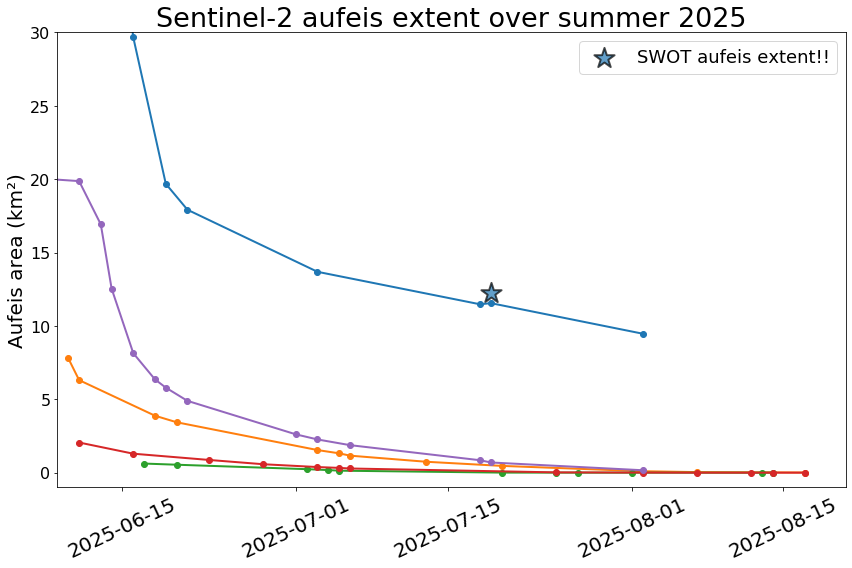

In [3]:
# convert m2 area to km2
df["area_km2"] = df["area"] / 1e6

# plot!!
plt.figure(figsize=(12,8))

for p in [1, 2, 3, 4, 5]:
    mask = df["polygon"] == p
    # line plot with markers for the points
    plt.plot(df["date"][mask], df["area_km2"][mask],
#              label=f"Polygon {p}",
             marker="o", markersize=6, linewidth=2)

# janky add for the SWOT point from the random forest
plt.scatter(pd.Timestamp("2025-07-19"), 12.22074, marker='*', facecolors="#1f77b4", 
            edgecolors='black', linewidths=2, s=450, label="SWOT aufeis extent!!", alpha = 0.7)

plt.title("Sentinel-2 aufeis extent over summer 2025", fontsize=27)
plt.ylabel("Aufeis area (km²)", fontsize=20)
plt.xticks(rotation=25, fontsize=20)
plt.yticks(fontsize=16)
plt.legend(fontsize=18)
plt.xlim(left=pd.Timestamp("2025-06-09"))
plt.ylim(-1, 30)
plt.tight_layout()
plt.show()
